River Kelly

Kyler Gappa

CSCI-347

Project 03: Dimensinality Reduction and Clustering

This project may be completed individually or with group of up to size three. Turn in the code
and written responses in both Brightspace and Gradescope.

Choose a data set that you are interested in from the UCI Machine Learning Repository that has
at least five numerical attributes, and that you believe may contain clusters. Only use the numerical
attributes for this project. Note: if you are planning to complete the extra credit portion of this
project, you will need to use a data set that has class labels (ground truth cluster labels), i.e., a
classification data set, in order to compute the accuracy of the clustering. If you would like to use
a data set from a different source, please discuss this with me.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import urllib.request
import io

# plt.rcParams["figure.figsize"] = (20,20)

# Part 1: Think about the data

  This data is interesting because it takes a unique approach to language analysis. An understanding of writing could help us recognise and decipher currently unreadable text. There are six numerical and zero categorical attributes. The repository says that there are no missing attributes in the dataset so no extra techniques will be used unless missing values are found. we expect that there will be a few clusters due to a few different reasons. There is a chance for clusters for each number (i.e. all 4's will form a cluster) and a chance for clusters of every number from people that write similarly. If clusters exist then we can use the range of values that fit within the cluster to help identify similar letters in the future. We expect for there to be four to ten clusters as there a few numbers that may have similar shapes or may have consistent shapes that are mathmatically similar. We expect there to be some clusters that are differing sizes as there are some shapes that more numbers fall into and that should result in a larger cluster (i.e. 6, 8, 9 vs 1, 7).

# Part 2: Write Python code for clustering

Write the following functions in Python. You may use scikit-learn or other packages to check
the correctness of your implementation, but you may not use any existing clustering algorithm
implementation in your code.

## 1. (10 points) *k*-means Clustering Algorithm

A function that implements the $k$-means clustering
algorithm. The function should take a data matrix, a number of clusters $k$,
and a convergence parameter $\epsilon$, as input, and return the
representatives (means) as well as the clusters found using $k$-means. If
the distance is the same between a point and more than one representative
(mean), then assign the point to the mean corresponding to the cluster with
the lowest index.

In [ ]:
def kMeanClustering(m, k_cluster: int, convergence = 0.0):
    # var: points_dict
    # --------------------------------------------------------------------------
    # disctionary of points (x, y) from the data
    points_dict = dict()

    # populate points_dict
    for index, point_data in enumerate(m):
        points_dict[index] = (point_data[0], point_data[1])
    # sort the points_dict
    points_dict = {k: v for k, v in sorted(points_dict.items(), key=lambda item: item[1][1])}
    
    # var: clusters
    # --------------------------------------------------------------------------
    # dictionary of clusters data
    clusters = dict()
    
    # init_points_indices
    # -------------------
    # list to help ensure that each cluster has a unique randomly selected point
    init_points_indices = list() 

    # initialize k_cluaster
    for i in range(k_cluster):
        # select random point for cluser
        init_point_index = random.randint(0, D.shape[0]-1)
        # ensure that the random point for the cluster is unique
        # and has not yet been used
        while init_point_index in init_points_indices:
            # this point has been used, generate another
            init_point_index = random.randint(0, D.shape[0]-1)
        # keep track of used points
        init_points_indices.append(init_point_index)
        # get the point from the points_dict based on its randomly choosen
        # index
        init_point = points_dict[init_point_index]
        # make the cluster data and initialize it in the clusters dictionary
        clusters[i] = {
            'mean': (init_point[0], init_point[1]),
            'points_indices': list()
        }

    # Now the k_clusters have been initialize, its time to iterate through each
    # of the points in the data and add it to the cluster where to distance from
    # the point to the mean of the cluster is the smallest amoung all clusters

    cluster_iters = list() # list of clusters data for each iteration
    count_iter = 0 # counter for the number of iterations computed
    while True:
        count_iter += 1 # increase counter

        # this is only a safety precaution, the stopping of the iterations
        # should be terminated based on the convergence from the previous
        # and last iteration, see code below
        if count_iter > 10000: break

        # add points to clusters based on the distance the point is from the
        # mean of the cluster
        for (point_index, point) in points_dict.items(): # iterate over points
            # this variable (cluster_to_point_distances_dict) helps in finding
            # the cluster mean closest to the point being examined
            cluster_to_point_distances_dict = dict()

            # iterate over each cluster
            for (cluster_index, cluster) in clusters.items():
                # compute the distance between the current point the cluster mean
                distance_x = cluster['mean'][0] - point[0]
                distance_y = cluster['mean'][1] - point[1]
                distance = ( (distance_x ** 2) + (distance_y ** 2) ) ** (1/2)
                # save this distance
                cluster_to_point_distances_dict[cluster_index] = distance
            # sort distances from point to each cluster
            cluster_to_point_distances_dict = {k: v for k, v in sorted(cluster_to_point_distances_dict.items(), key=lambda item: item[1])}
            # get the cluster index that has the smallest distance between
            # its mean and the current point
            closest_cluster_index = list(cluster_to_point_distances_dict.keys())[0]
            # add point to closest cluster
            clusters[closest_cluster_index]['points_indices'].append(point_index)

            # update cluster mean (i.e. we just added a new point to this
            # cluster so we need to update the mean value for the cluster)
            x_sum = y_sum = 0
            for cluster_point_index in clusters[closest_cluster_index]['points_indices']:
                cluster_point = points_dict[cluster_point_index]
                x_sum += cluster_point[0]
                y_sum += cluster_point[1]
            num_cluster_points = len(clusters[closest_cluster_index]['points_indices'])
            x_mean = x_sum / num_cluster_points
            y_mean = y_sum / num_cluster_points
            # set new mean value
            clusters[closest_cluster_index]['mean'] = (x_mean, y_mean)

        # calculate the total distance of points from the mean in each cluster
        total_distance_sum = 0
        for (cluster_index, cluster) in clusters.items():
            distance = 0
            for point_index in cluster['points_indices']:
                point = points_dict[point_index]
                distance += (((point[0]-cluster['mean'][0])**2)+((point[1]-cluster['mean'][1])**2))**(1/2)
            clusters[cluster_index]['dist_sum'] = distance
            total_distance_sum += distance

        # save this iteration of clustering
        cluster_iters.append({
            'clusters': clusters,
            'total_distance': total_distance_sum
        })

        # check if clustering iteration has converged from the last iteration
        if len(cluster_iters) > 1:
            last_cluster_dist = cluster_iters[-2]['total_distance']
            dist_diff = abs(total_distance_sum - last_cluster_dist)
            if dist_diff <= convergence:
                break

        # Since the loop was not terminated, we need to prepare for the next
        # iteration. Therefor, lets clean the clusters (i.e. remove the 
        # points assign from this iteration but keep the mean)
        # remove cluster points for next iteration
        new_clusters = dict()
        for (i, cluster) in clusters.items():
            new_clusters[i] = {
                'mean': (cluster['mean'][0], cluster['mean'][1]),
                'points_indices': list()
            }
        clusters = new_clusters
        # END OF clustering loop

    # get the last clusters iteration
    clusters = cluster_iters[-1]['clusters']

    pred_labels = [0] * D.shape[0]
    for cluster_index in clusters:
        cluster = clusters[cluster_index]
        for point in cluster['points_indices']:
            pred_labels[point] = cluster_index
    
    centers = np.ndarray(shape=(k_cluster, 2))
    for i, cluster in enumerate(clusters.values()):
        centers[i] = cluster['mean']

    plt.scatter(D[:,0], D[:,1], c=pred_labels)
    plt.scatter(centers[:,0], centers[:,1], c='red')

    # get the means
    means = np.ndarray(shape=(k_cluster, 2))
    clusters_data = list()
    for i, cluster in enumerate(clusters.values()):
        means[i] = [cluster['mean'][0], cluster['mean'][1]]
        cluster_points = np.ndarray(shape=(len(cluster['points_indices']), 2))
        for cluster_point_index, point_index in enumerate(cluster['points_indices']):
          point = points_dict[point_index]
          cluster_points[cluster_point_index] = [point[0], point[1]]
        clusters_data.append(cluster_points)

    return means, clusters_data

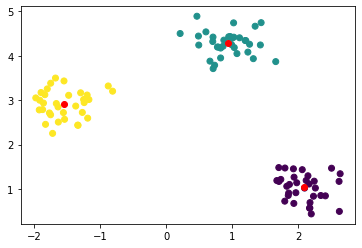

In [ ]:
from sklearn.datasets import make_blobs
D, labels = make_blobs(n_samples=100, centers=3, cluster_std=.3, random_state=0)
means, clusters = kMeanClustering(D, 3, 0.5)

## 2. (10 points) DBSCAN Clustering Algorithm

A function that implements the DBSCAN clustering
algorithm. The function should take a data matrix and the parameters
*minpts* and $\epsilon$, as input, and return the clusters found using
DBSCAN, and for each data point a label of core, border, or noise point.

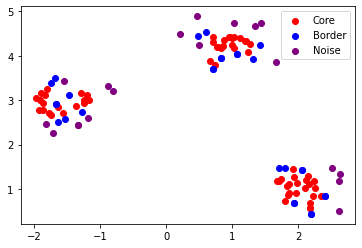

In [ ]:
def distanceBetweenPoints(a, b):
    return (((a[0]-b[0])**2)+((a[1]-b[1])**2))**(1/2)

def dbScanClustering(m, minpts, eps):
    # dictionary of points (x, y) from the data
    points_dict = dict()
    # populate points_dict
    for index, point_data in enumerate(m):
        points_dict[index] = (point_data[0], point_data[1])

    # Find the core points
    core_points_indicies = list()
    for point_a_index, point_a in points_dict.items():
        eps_close_points = list()
        for point_b_index, point_b in points_dict.items():
            if point_a_index == point_b_index: continue
            dist = distanceBetweenPoints(point_a, point_b)
            if dist <= eps:
                eps_close_points.append(point_b_index)
                if len(eps_close_points) >= minpts:
                    break
        if len(eps_close_points) >= minpts:
            core_points_indicies.append(point_a_index)

    
    # add core points to clusters
    clusters = list()
    current_cluster = list()
    used_core_points = list()
    active_core_points = core_points_indicies[:]
    current_cluster.append(active_core_points.pop())
    added_new_points = True
    while True:

        if added_new_points is False:
            if len(active_core_points) < 1:
                if len(current_cluster) > 0:
                    clusters.append(current_cluster[:])
                break
            clusters.append(current_cluster[:])
            current_cluster = list()
            current_cluster.append(active_core_points.pop())

        added_new_points = False

        for cluster_core_p_index in current_cluster:
            cluster_point = points_dict[cluster_core_p_index]
            active_core_points_temp = active_core_points[:]
            
            for core_point_index in active_core_points_temp:
                if core_point_index in current_cluster: continue
                core_point = points_dict[core_point_index]

                dist = distanceBetweenPoints(cluster_point, core_point)
                if dist > eps: continue
                added_new_points = True
                current_cluster.append(core_point_index)
                used_core_points.append(core_point_index)
                active_core_points_temp.remove(core_point_index)
            

            active_core_points = active_core_points_temp[:]
            # active_core_points = active_core_points_temp[:]
            if added_new_points: break



    remaining_points = list()
    for p in points_dict:
        if p not in core_points_indicies:
            remaining_points.append(p)

    border_points = list()
    for point_index in remaining_points:
        point = points_dict[point_index]

        for cluster_index, cluster in enumerate(clusters):
            temp_cluster = cluster[:]
            for cluster_p_index in cluster:
                cluster_point = points_dict[cluster_p_index]

                dist = distanceBetweenPoints(cluster_point, point)

                if dist > eps: continue

                temp_cluster.append(point_index)
                border_points.append(point_index)
                # remaining_points.remove(point_index)

            clusters[cluster_index] = temp_cluster

        # if added_new_points is True: break
    # print(current_cluster)
    # print(active_core_points_temp)
    pred_labels = [0] * m.shape[0]
    for p in core_points_indicies:
        pred_labels[p] = 2
    for p in border_points:
        pred_labels[p] = 1

    core_points_data = np.ndarray(shape=(len(core_points_indicies), 2))
    for i, p in enumerate(core_points_indicies):
        point = points_dict[p]
        core_points_data[i] = [point[0], point[1]]
    

    border_points_data = np.ndarray(shape=(len(border_points), 2))
    for i, p in enumerate(border_points):
        point = points_dict[p]
        border_points_data[i] = [point[0], point[1]]

    noise_points = list()
    for p in points_dict:
        if p in core_points_indicies: continue
        if p in border_points: continue
        noise_points.append(p)

    noise_points_data = np.ndarray(shape=(len(noise_points), 2))
    for i, p in enumerate(noise_points):
        point = points_dict[p]
        noise_points_data[i] = [point[0], point[1]]

    plt.scatter(core_points_data[:,0], core_points_data[:,1], c='red')
    plt.scatter(border_points_data[:,0], border_points_data[:,1], c='blue')
    plt.scatter(noise_points_data[:,0], noise_points_data[:,1], c='purple')

    # plt.scatter(m[:,0], m[:,1], c=pred_labels)
    plt.legend(('Core', 'Border', 'Noise'))
    plt.show()

    # pred_labels = [0] * m.shape[0]
    # for i, c in enumerate(clusters):
    #     for p in c:
    #         pred_labels[p] = i+1
    # #     # print(i, c)
    # plt.scatter(m[:,0], m[:,1], c=pred_labels)
    # plt.show()

    # print(core_points_indicies)


dbScanClustering(D, 3, 0.2)

# Part 3: Analyze your data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def readFileData(filename):
    file = f"/content/drive/My Drive/347-Data-Mining/Project-03/mfeat/{filename}"
    lines = list()
    with open(file, 'r') as f:
        lines = f.readlines()
    data = list()
    for line in lines:
        line = line.strip()
        if len(line) < 1: continue
        line_data = line.split(' ')
        clean_data = list()
        for i, val in enumerate(line_data):
            val = val.strip()
            if len(val) < 1: continue
            val = float(val)
            clean_data.append(val)
        data.append(clean_data)
    return data

DATA_FILES_NAMES = [
    'mfeat-fou',
    'mfeat-fac',
    'mfeat-kar',
    'mfeat-pix',
    'mfeat-zer',
    'mfeat-mor',
]
DATA_FILES_DATA = {}
for filename in DATA_FILES_NAMES:
    DATA_FILES_DATA[filename] = readFileData(filename)

DATA = []
for file_data in DATA_FILES_DATA.values():
    for line_num, line_data_list in enumerate(file_data):
        if line_num > 1999: continue
        if len(DATA) - 1 <= line_num: DATA.append([])
        for line_data_item in line_data_list:
            DATA[line_num].append(float(line_data_item))
for i, lines_rows in enumerate(DATA):
    if len(lines_rows) < 1:
        DATA.pop(i)

D = np.ndarray(shape=(2000, 649))
for i, lines_rows in enumerate(DATA):
    D[i] = np.array(lines_rows)
D

array([[6.58817200e-02, 1.97311690e-01, 1.03825630e-01, ...,
        1.33150861e+02, 1.31169276e+00, 1.62022178e+03],
       [4.91421500e-02, 1.75970680e-01, 1.05514640e-01, ...,
        1.26724861e+02, 1.30274497e+00, 1.60933482e+03],
       [3.41719200e-02, 2.27648880e-01, 1.08766360e-01, ...,
        1.31173861e+02, 1.31903101e+00, 1.56897843e+03],
       ...,
       [3.35605960e-01, 3.18426000e-01, 2.57948220e-01, ...,
        1.34672861e+02, 1.54198735e+00, 3.76676322e+03],
       [2.53909620e-01, 1.71202410e-01, 3.02621990e-01, ...,
        1.42926861e+02, 1.42638097e+00, 4.11832732e+03],
       [2.71574850e-01, 1.49036810e-01, 2.32752530e-01, ...,
        1.33920861e+02, 1.56462053e+00, 3.80802132e+03]])

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


## 1. (4 points)

Use sklearn's PCA implementation to linearly transform the
data to two dimensions. Create a scatter plot of the data, with the $x$-axis
corresponding to coordinates of the data along the first principal
component, and the $y$-axis corresponding to coordinates of the data along
the second principal component. Does it look like there are clusters in
these two dimensions? If so, how many would you say there are?

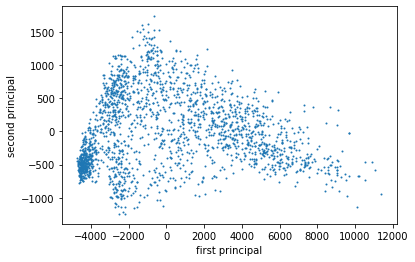

In [ ]:
pca_2_comps = PCA(n_components=2)
pca_D_2_comps = pca_2_comps.fit_transform(D)

plt.scatter(pca_D_2_comps[:,0], pca_D_2_comps[:,1], s=1)
plt.xlabel('first principal')
plt.ylabel('second principal')
plt.show()

  We identified potentially 4 clusters that exist in the dataset. The first is a very tightly grouped area in the left side of the graph. The second cluster is above the primary cluster and has a much looser grouping. We think this may be a cluster as it has a higher desity than the rest of the graph but seems to be centered on a different point than the primary cluster. The third probable cluster is located below the second and to the right of the first. This cluster is less dense than the previous two but has a few separate groups that form in the same area. The last possible cluster is located in the right of the graph and is the least densely populated cluster. We recognise this as a possible cluster since it has an apparent oval shape and is in an area that has little other structure to it. This section is almost entirely separate from the other clusters

## 2. (3 points)

Use sklearn's PCA implementation to linearly transform the
data, without specifying the number of components to use. Create a plot with
$r$, the number of components (i.e., dimensionality), on the $x$-axis, and
$f(r)$, the fraction of total variance captured in the first $r$ principal
components, on the $y$-axis. Based on this plot, choose a number of
principal components to reduce the dimensionality of the data. Report how
many principal components will be used as well as the faction of total
variance captured using this many components.

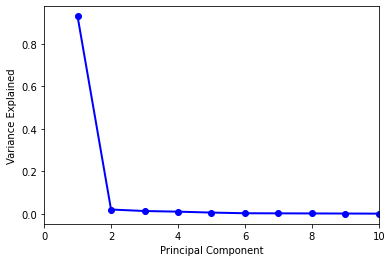

0.9498650293248446

In [ ]:
pca = PCA()
pca_D = pca.fit_transform(D)

def covariance(v1, v2 = None):
    if v2 is None: v2 = v1
    # vector 1 mean
    v1_mean = v1.mean()
    # vector 2 mean
    v2_mean = v2.mean()
    # co_var (the covariance between v1 and v2)
    co_var = 0
    # loop through v1 and v2 values
    for i in range(v1.shape[0]):
        co_var += (v1[i] - v1_mean) * (v2[i] - v2_mean)
    # calculate and return the co-variance between v1 and v2
    return (co_var / (v1.shape[0] - 1))

def get_variance_explained(evals):
  csum = np.cumsum(pca_D)
  variance_explained = csum / np.sum(pca_D)

  return variance_explained

PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xlim(0, 10)
plt.show()

pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

We will be using 2 priciple components and this will cover 94.98% of all of the variance

## 3. (5 points)

For both the original and the reduced-dimensionality data
obtained using PCA in question 1, do the
following: Experiment with a range of values for the number of clusters,
$k$, that you pass as input to the $k$-means function, to find clusters in
the chosen data set. Use at least 5 different values of $k$. For each value
of $k$, report the value of the objective function for that choice of $k$.

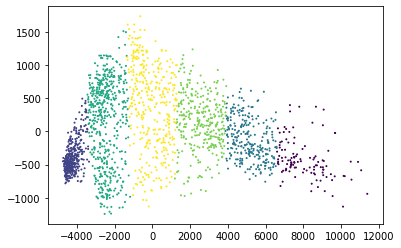

In [ ]:
from sklearn.cluster import KMeans
# 6 clusters
kmeans = KMeans(n_clusters=6, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(pca_D_2_comps)
plt.scatter(pca_D_2_comps[:,0], pca_D_2_comps[:,1], c=pred_labels, s=1)

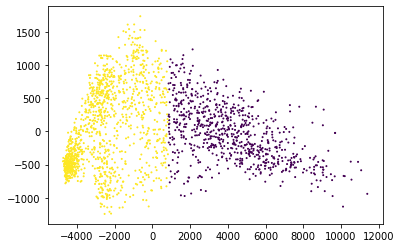

In [ ]:
# 2 clusters
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(pca_D_2_comps)
plt.scatter(pca_D_2_comps[:,0], pca_D_2_comps[:,1], c=pred_labels, s=1)

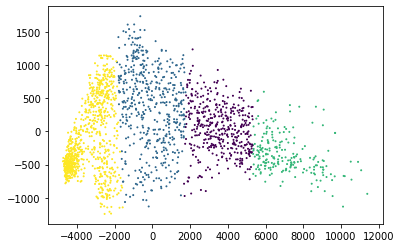

In [ ]:
# 4 clusters
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(pca_D_2_comps)
plt.scatter(pca_D_2_comps[:,0], pca_D_2_comps[:,1], c=pred_labels, s=1)

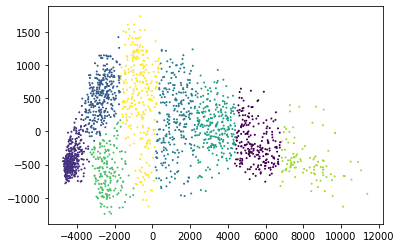

In [ ]:
# 8 clusters
kmeans = KMeans(n_clusters=8, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(pca_D_2_comps)
plt.scatter(pca_D_2_comps[:,0], pca_D_2_comps[:,1], c=pred_labels, s=1)

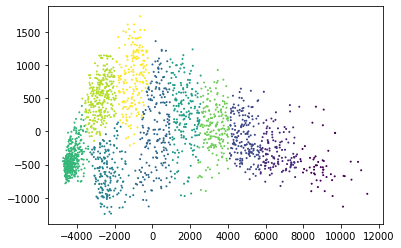

In [ ]:
# 10 clusters
kmeans = KMeans(n_clusters=10, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(pca_D_2_comps)
plt.scatter(pca_D_2_comps[:,0], pca_D_2_comps[:,1], c=pred_labels, s=1)

## 4. (5 points)

For both the original and the reduced-dimensionality data
obtained using PCA in question 1, do the following:
Experiment with a range of values for the *minpts* and $\epsilon$ input
parameters to the DBSCAN function to find clusters in the chosen data set.
First, keep $\epsilon$ fixed and try out a range of different values for
*minpts*. Then keep *minpts* fixed, and try a range of values for
$\epsilon$. Use at least 5 values of $\epsilon$ and at least 5 values of
*minpts*. Report the number of clusters found for each (*minpts*,
$\epsilon$) pair tested.

In [108]:
from sklearn.cluster import DBSCAN

def dbScanPlotEPS(data, eps=75, samples=4):
  dbs = DBSCAN(eps=eps, min_samples=4)
  pred_labels = dbs.fit_predict(data)
  plt.scatter(data[:,0], data[:,1], c=pred_labels)
  plt.show()
  print('Number of Clusters:', len(set(pred_labels))-1)

Change in EPS

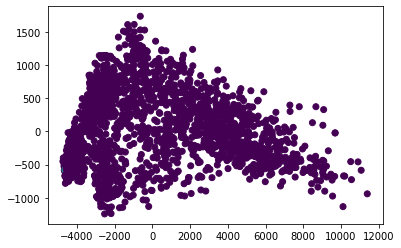

Number of Clusters: 2


In [109]:
dbScanPlotEPS(pca_D_2_comps, eps=10, samples=4)

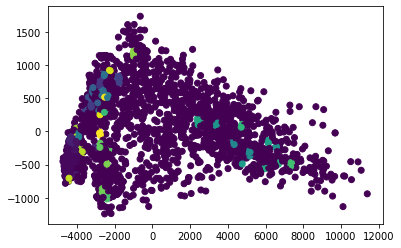

Number of Clusters: 46


In [110]:
dbScanPlotEPS(pca_D_2_comps, eps=50, samples=4)

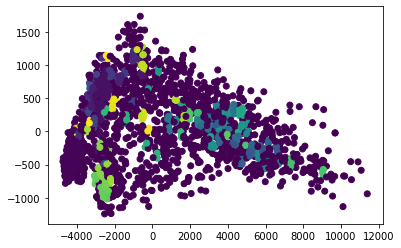

Number of Clusters: 97


In [111]:
dbScanPlotEPS(pca_D_2_comps, eps=75, samples=4)

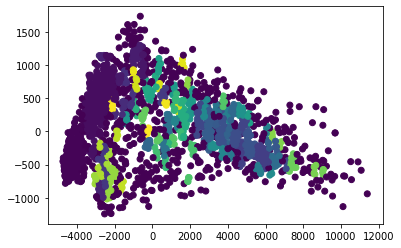

Number of Clusters: 89


In [112]:
dbScanPlotEPS(pca_D_2_comps, eps=100, samples=4)

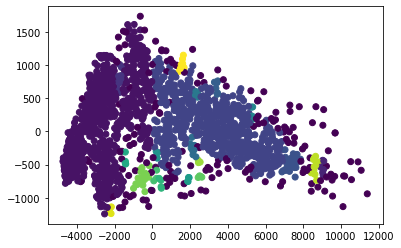

Number of Clusters: 20


In [113]:
dbScanPlotEPS(pca_D_2_comps, eps=150, samples=4)

Change in min-sample

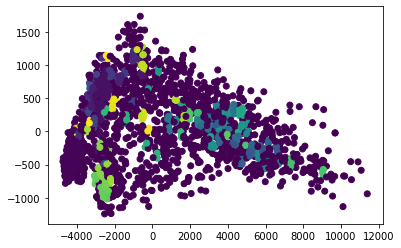

Number of Clusters: 97


In [114]:
dbScanPlotEPS(pca_D_2_comps, samples=2)

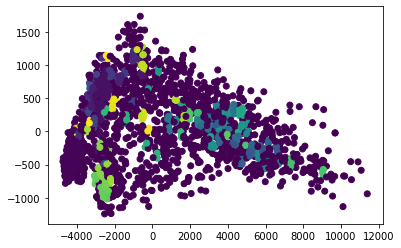

Number of Clusters: 97


In [115]:
dbScanPlotEPS(pca_D_2_comps, samples=3)

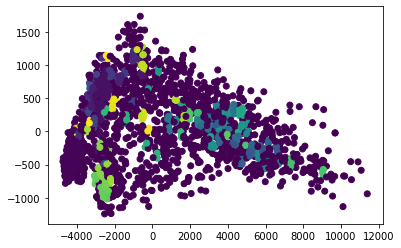

Number of Clusters: 97


In [116]:
dbScanPlotEPS(pca_D_2_comps, samples=4)

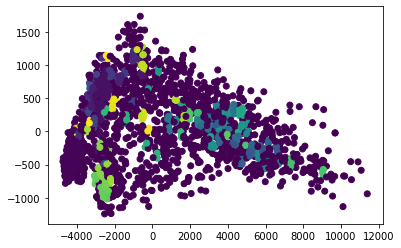

Number of Clusters: 97


In [117]:
dbScanPlotEPS(pca_D_2_comps, samples=5)

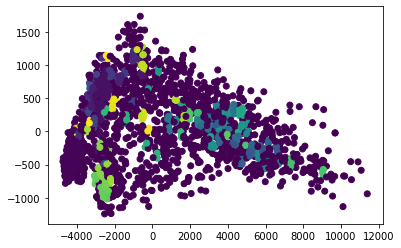

Number of Clusters: 97


In [118]:
dbScanPlotEPS(pca_D_2_comps, samples=6)

Original data

change in eps

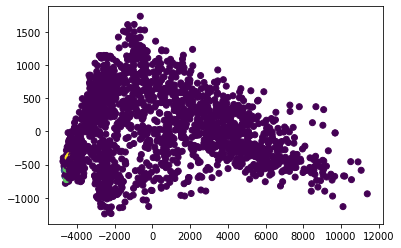

Number of Clusters: 4


In [119]:
dbScanPlotEPS(pca_D, eps=300)

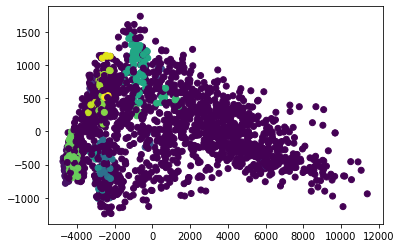

Number of Clusters: 22


In [120]:
dbScanPlotEPS(pca_D, eps=400)

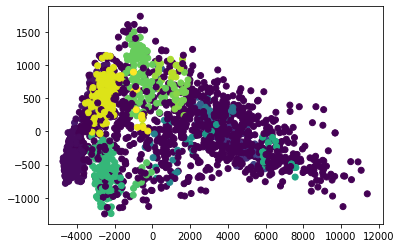

Number of Clusters: 39


In [121]:
dbScanPlotEPS(pca_D, eps=500)

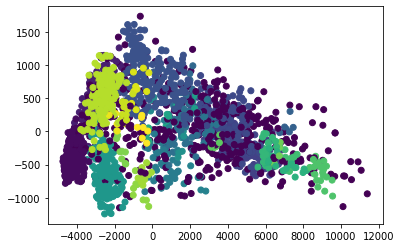

Number of Clusters: 36


In [122]:
dbScanPlotEPS(pca_D, eps=600)

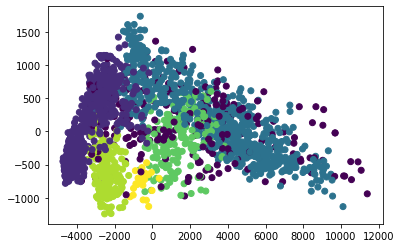

Number of Clusters: 8


In [123]:
dbScanPlotEPS(pca_D, eps=700)

Change in min-sample

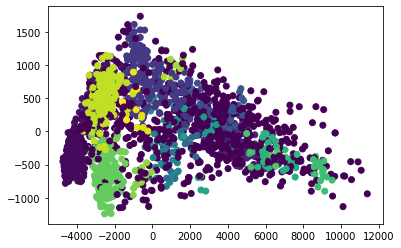

Number of Clusters: 42


In [124]:
dbScanPlotEPS(pca_D, eps=550, samples=2)

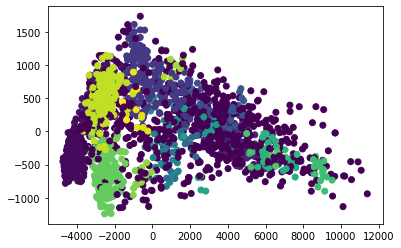

Number of Clusters: 42


In [125]:
dbScanPlotEPS(pca_D, eps=550, samples=3)

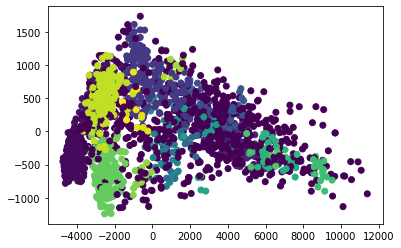

Number of Clusters: 42


In [126]:
dbScanPlotEPS(pca_D, eps=550, samples=4)

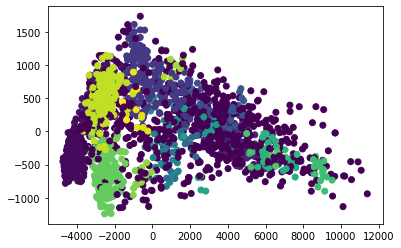

Number of Clusters: 42


In [127]:
dbScanPlotEPS(pca_D, eps=550, samples=5)

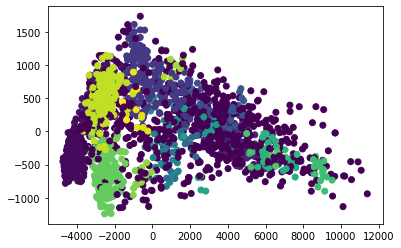

Number of Clusters: 42


In [128]:
dbScanPlotEPS(pca_D, eps=550, samples=100)

# Tips and Acknowledgements

Make sure to submit your answer as a PDF on Gradscope and Brightspace. Make sure
to show your work. Include any code snippets you used to generate an answer,
using comments in the code to clearly indicate which problem corresponds to
which code.

**Acknowledgements**: Project adapted from assignments of Veronika Strnadova-Neeley.